In [1]:
import os

n_dSPN = 5
n_iSPN = 5
n_FS = 2
n_LTS = 2
n_ChIN = 2

hold_v = -80e-3    # Holding voltage
max_dist = 100e-6  # Only look at pairs closer than this distance
GABA_rev = -60e-3  # GABA reversal potential

cur_inj = 10e-9

network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 200e-6

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

Using cube for striatum
Adding neurons: FS from dir $SNUDDA_DATA/neurons/striatum/fs
Adding neurons: dSPN from dir $SNUDDA_DATA/neurons/striatum/dspn
Adding neurons: iSPN from dir $SNUDDA_DATA/neurons/striatum/ispn
Adding neurons: ChIN from dir $SNUDDA_DATA/neurons/striatum/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002],[-0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[-0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[-3.e-05]) = [1.84256218e-10]
LTS axon density P([-0.0002],[0.0001],[3.e-05]) = [1.84256218e-10]
LTS axon density P([0.0009],[-0.0001],[-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[-0.0001],[3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[0.0001],[-3.e-05]) = [1.72360142e-23]
LTS axon density P([0.0009],[0.0001],[3.e-05]) = [1.72360142e-23]
Adding neurons: LTS from dir $SNUDDA_DATA/neurons/striatum/lts
Writing networks/pair_recording_simulation/network-config.json


In [3]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.place()

In [4]:
from snudda.detect import SnuddaDetect
sd = SnuddaDetect(network_path=network_path)
sd.detect()

Instantiates par_id = 0
morph_tag = optim_chin_morph_renamed2019-11-08.swc
Instantiates par_id = 0
morph_tag = lts_morp_2019-11-07_centered_no_axon.swc
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 20/64 (16 neurons)
Processing hyper voxel : 21/64 (16 neurons)
Processing hyper voxel : 4/64 (15 neurons)
Processing hyper voxel : 5/64 (15 neurons)
Processing hyper voxel : 17/64 (11 neurons)
Processing hyper voxel : 9/64 (10 neurons)
Processing hyper voxel : 25/64 (8 neurons)
Processing hyper voxel : 1/64 (7 neurons)
Processing hyper voxel : 37/64 (7 neurons)
Processing hyper voxel : 16/64 (7 neurons)
Processing hyper voxel : 0/64 (6 neurons)
Processing hyper voxel : 24/64 (5 neurons)
Processing hyper voxel : 8/64 (4 neurons)
Processing hyper voxel : 36/64 (4 neurons)
Processing hyper voxel : 22/64 (2 neurons)
Processing hyper voxel : 33/64 (2 neurons)
Processing hyper voxel : 6/64 (1 neurons)
Processing hyper voxel : 32/64 (1 neurons)
Processing hyper 

In [5]:
from snudda.detect import SnuddaPrune
spr = SnuddaPrune(network_path=network_path)
spr.prune()
spr = None

Read 3505 out of total 3505 synapses
Read 4 out of total 4 synapses


Compile neuron modules

In [6]:
!nrnivmodl ../../snudda/data/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../snudda/data/neurons/mechanisms/bk_ch.mod" "../../snudda/data/neurons/mechanisms/bk_fs.mod" "../../snudda/data/neurons/mechanisms/bk_ms.mod" "../../snudda/data/neurons/mechanisms/ca_ch.mod" "../../snudda/data/neurons/mechanisms/cadyn_fs.mod" "../../snudda/data/neurons/mechanisms/cadyn_ms.mod" "../../snudda/data/neurons/mechanisms/cal12_ms.mod" "../../snudda/data/neurons/mechanisms/cal13_ms.mod" "../../snudda/data/neurons/mechanisms/cal_ch.mod" "../../snudda/data/neurons/mechanisms/caldyn_ms.mod" "../../snudda/data/neurons/mechanisms/can_fs.mod" "../../snudda/data/neurons/mechanisms/can_ms.mod" "../../snudda/data/neurons/mechanisms/cap_ch.mod" "../../snudda/data/neurons/mechanisms/caq_fs.mod" "../../snudda/data/neurons/mechanisms/caq_ms.mod" "../../snudda/data/neurons/mechanisms/car_fs.mod" "../../snudda/data/neurons/mechanisms/car_ms.mod" "../../snudda/data/neurons/mechanisms/cat32_ms.mod" "../../snudda/data/neurons/mechanisms

In [7]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "experiment-config-1.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file)
pr.run()

Loading 16 neurons with 225 synapses and 0 gap junctions
Running simulation for 5.0 s
1% done. Elapsed: 29.5 s, estimated time left: 2920.3 s
5% done. Elapsed: 141.8 s, estimated time left: 2693.6 s
9% done. Elapsed: 273.5 s, estimated time left: 2765.3 s
12% done. Elapsed: 383.7 s, estimated time left: 2814.0 s
15% done. Elapsed: 490.8 s, estimated time left: 2781.3 s
18% done. Elapsed: 591.7 s, estimated time left: 2695.7 s
22% done. Elapsed: 714.1 s, estimated time left: 2531.8 s
25% done. Elapsed: 819.1 s, estimated time left: 2457.2 s
29% done. Elapsed: 953.5 s, estimated time left: 2334.4 s
33% done. Elapsed: 1087.3 s, estimated time left: 2207.5 s
36% done. Elapsed: 1188.1 s, estimated time left: 2112.2 s
40% done. Elapsed: 1321.5 s, estimated time left: 1982.3 s
43% done. Elapsed: 1422.8 s, estimated time left: 1886.0 s
46% done. Elapsed: 1524.4 s, estimated time left: 1789.5 s
50% done. Elapsed: 1656.9 s, estimated time left: 1656.9 s
53% done. Elapsed: 1758.3 s, estimated tim

Plot results

In [12]:
from snudda.plotting import PlotTraces
pt = PlotTraces(file_name=os.path.join(network_path,"simulation","network-voltage.txt"),
                network_file=os.path.join(network_path, "network-synapses.hdf5"))

Unable to guess ID, using 666.
Loading 16 neurons with 225 synapses and 0 gap junctions


Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
Plotted 16 traces (total 16)
Saving to figure Network-voltage-trace-666-LTS-FS-ChIN-iSPN-dSPN-colour.pdf


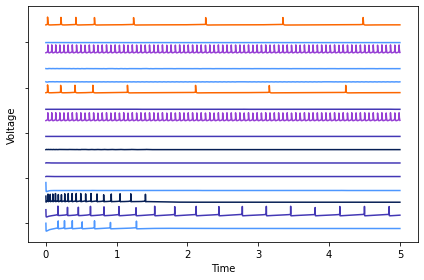

<Figure size 432x288 with 0 Axes>

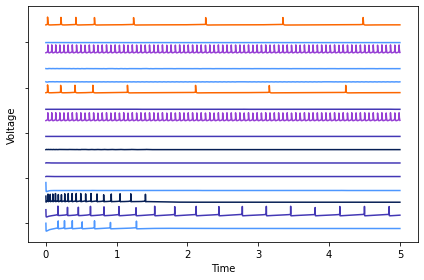

In [19]:
pt.plot_traces([x for x in pt.voltage])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]